In [59]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import platform
from matplotlib.ticker import FuncFormatter
import plotly.graph_objects as go
from matplotlib import rcParams
import csv
import matplotlib.ticker as ticker

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지


total22_df = pd.read_csv("전연령22_utf8.csv", low_memory=False)
senior22_df = pd.read_csv("노인승하차22_utf8.csv", low_memory=False)
total24_df = pd.read_csv("전연령24_utf8.csv", low_memory=False)
senior24_df = pd.read_csv("노인승하차24_utf8.csv", low_memory=False)
total23_df = pd.read_csv("전연령23_utf8.csv", low_memory=False)
senior23_df = pd.read_csv("노인승하차23_utf8.csv", low_memory=False)
#senior_care_df = pd.read_csv("senior_care_utf8.csv", low_memory=False) # 파일이 사라짐
sme_df = pd.read_csv("sme.csv", low_memory=False)
park_df = pd.read_csv("TB_PTP_PRK_M.csv", low_memory=False)
safety_df = pd.read_csv("안전사고_utf.csv", low_memory=False)
elderly_2020_2022 = pd.read_csv(
    "elderly2020_2022.csv",
    low_memory=False,
    quoting=csv.QUOTE_NONE,
    encoding="utf-8",
    on_bad_lines='skip'  # 문제 있는 라인은 건너뜀
)
elderly_2023_2025 = pd.read_csv(
    "elderly2023_2025.csv",
    low_memory=False,
    quoting=csv.QUOTE_NONE,
    encoding="utf-8",
    on_bad_lines='skip'
)


# 역별 승하차인원           => total22_df, total24_df
# 65세 노인 승하차인원      => senior22_df, senior24_df
# 노인요양시설(요양원)      => senior_care_df
# 종사자, 사업체 수         => sme_df
# 안전사고                  => safety_df

# ------------------
# 확인용
# print(total22_df.head())
# print(total22_df.columns)
# print(senior22_df.head())
# print(senior22_df.columns)
# print(safety_df.head())
# print(senior_care_df.head())
# print(senior_care_df.columns)
# print(sme_df.head())
# print(sme_df.columns)
# print(park_df.head())
# ------------------

In [65]:

# ---------------------------
# 3. 시간대 컬럼 정의
# ---------------------------
time_cols = [
    '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
    '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
    '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
    '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'
]

# ---------------------------
# 4. 일일총승객수 컬럼 생성 함수
# ---------------------------
def add_total_passengers(df):
    for col in time_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    df['일일총승객수'] = df[time_cols].sum(axis=1)
    return df

# 적용
senior22_df = add_total_passengers(senior22_df)
senior23_df = add_total_passengers(senior23_df)
senior24_df = add_total_passengers(senior24_df)
total22_df = add_total_passengers(total22_df)
total23_df = add_total_passengers(total23_df)
total24_df = add_total_passengers(total24_df)

# ---------------------------
# 5. 연도별 합계 계산
# ---------------------------
senior_totals = [
    senior22_df['일일총승객수'].sum(),
    senior23_df['일일총승객수'].sum(),
    senior24_df['일일총승객수'].sum()
]

total_totals = [
    total22_df['일일총승객수'].sum(),
    total23_df['일일총승객수'].sum(),
    total24_df['일일총승객수'].sum()
]

years = ['2022년', '2023년', '2024년']

# ---------------------------
# 6. 노인 비율과 증가율 계산
# ---------------------------
# 전연령 대비 노인 비율 (%)
senior_ratio = [s/t*100 for s, t in zip(senior_totals, total_totals)]

# 노인 증가율 (전년도 대비 %)
senior_increase_rate = [0] + [(senior_totals[i] - senior_totals[i-1])/senior_totals[i-1]*100 for i in range(1, len(senior_totals))]

# 전연령 증가율 (전년도 대비 %)
total_increase_rate = [0] + [(total_totals[i] - total_totals[i-1])/total_totals[i-1]*100 for i in range(1, len(total_totals))]

# ---------------------------
# 7. 시각화 (Plotly)
# ---------------------------
fig = go.Figure()

# 노인 승하차 합계 선 그래프
fig.add_trace(go.Scatter(
    x=years, y=senior_totals,
    mode='lines+markers',
    name='노인 승하차',
    line=dict(color='crimson', width=3),
    marker=dict(size=10)
))

# 전연령 승하차 합계 선 그래프
fig.add_trace(go.Scatter(
    x=years, y=total_totals,
    mode='lines+markers',
    name='전연령 승하차',
    line=dict(color='royalblue', width=3, dash='dot'),
    marker=dict(size=10)
))

# 증가율과 비율 주석 추가
for i, year in enumerate(years):
    # 노인 증가율 + 비율
    fig.add_annotation(
        x=year, y=senior_totals[i],
        text=f"증가율: {senior_increase_rate[i]:.1f}%<br>비율: {senior_ratio[i]:.1f}%",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        font=dict(color='black', size=12)
    )
    # 전연령 증가율
    fig.add_annotation(
        x=year, y=total_totals[i],
        text=f"전연령 증가율: {total_increase_rate[i]:.1f}%",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=40,
        font=dict(color='royalblue', size=12)
    )

# 레이아웃 설정
fig.update_layout(
    title="2022~2024년 65세 이상 vs 전연령 승하차 비교",
    xaxis_title="연도",
    yaxis_title="승하차 총량(명)",
    template="plotly_white"
)


# --- 이전 그래프 구성 그대로 ---
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=years, y=senior_totals,
    mode='lines+markers',
    name='노인 승하차',
    line=dict(color='crimson', width=3),
    marker=dict(size=10)
))

fig.add_trace(go.Scatter(
    x=years, y=total_totals,
    mode='lines+markers',
    name='전연령 승하차',
    line=dict(color='royalblue', width=3, dash='dot'),
    marker=dict(size=10)
))

# 증가율과 비율 주석
for i, year in enumerate(years):
    fig.add_annotation(
        x=year, y=senior_totals[i],
        text=f"증가율: {senior_increase_rate[i]:.1f}%<br>비율: {senior_ratio[i]:.1f}%",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        font=dict(color='black', size=12)
    )
    fig.add_annotation(
        x=year, y=total_totals[i],
        text=f"전연령 증가율: {total_increase_rate[i]:.1f}%",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=40,
        font=dict(color='royalblue', size=12)
    )

# --- y축 한국 단위 적용 ---
def korea_tick_format(x):
    if x >= 1e8:
        return f"{x/1e8:.1f}억 명"
    elif x >= 1e4:
        return f"{x/1e4:.1f}만 명"
    else:
        return f"{int(x)}명"

fig.update_layout(
    title="2022~2024년 65세 이상 vs 전연령 승하차 비교",
    xaxis_title="연도",
    yaxis_title="승하차 총량(명)",
    yaxis=dict(
        tickmode='auto',
        tickformat='',
        tickvals=[0, 1e6, 5e6, 1e7, 2e7],  # 필요하면 눈금값 조정
        ticktext=[korea_tick_format(x) for x in [0, 1e6, 5e6, 1e7, 2e7]]
    ),
    template="plotly_white"
)

fig.show()



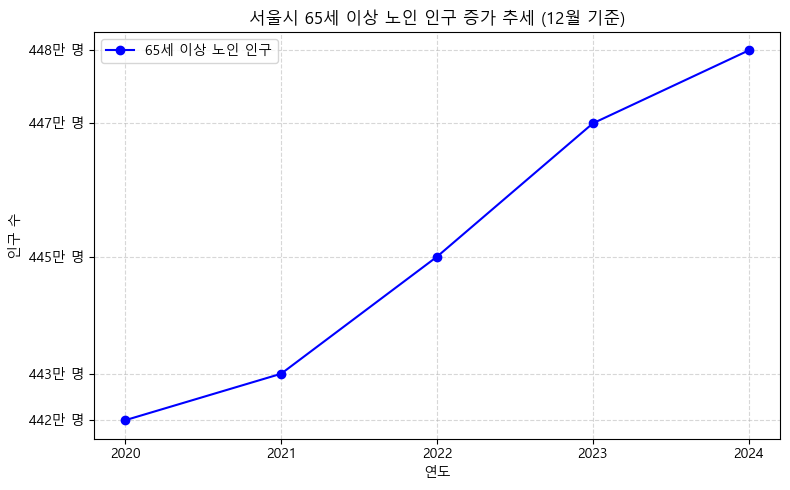

In [55]:

# -------------------------------
# 컬럼명과 문자열 공백 제거
# -------------------------------
for df in [elderly_2020_2022, elderly_2023_2025]:
    df.columns = df.columns.str.replace('"', '').str.strip()
    df['구분별'] = df['구분별'].astype(str).str.replace('"','').str.strip()
    df['동별'] = df['동별'].astype(str).str.replace('"','').str.strip()

# -------------------------------
# 합계 행 필터링
# -------------------------------
sum_2020_2022 = elderly_2020_2022[(elderly_2020_2022['구분별']=='세대') & 
                                  (elderly_2020_2022['동별']=='합계')]
sum_2023_2025 = elderly_2023_2025[(elderly_2023_2025['구분별']=='세대') & 
                                  (elderly_2023_2025['동별']=='합계')]

# -------------------------------
# 12월 데이터 컬럼
# -------------------------------
dec_columns_2020_2022 = ['2020. 12 월', '2021. 12 월', '2022. 12 월']
dec_columns_2023_2025 = ['2023. 12 월', '2024. 12 월']

# -------------------------------
# 문자열 -> 숫자 변환 (쉼표, 공백 제거)
# -------------------------------
def clean_to_int(series):
    return series.replace(r'[",\s]', '', regex=True).astype(int)

elderly_dec_2020_2022 = clean_to_int(sum_2020_2022[dec_columns_2020_2022].iloc[0])
elderly_dec_2023_2025 = clean_to_int(sum_2023_2025[dec_columns_2023_2025].iloc[0])

# -------------------------------
# 연도별 시리즈 합치기
# -------------------------------
elderly_dec_series = pd.concat([elderly_dec_2020_2022, elderly_dec_2023_2025])
elderly_dec_series.index = [2020, 2021, 2022, 2023, 2024]

# -------------------------------
# 만 명 단위로 변환
# -------------------------------
values_in_10k = elderly_dec_series.values / 10000  # 만 명 단위

# -------------------------------
# 그래프 그리기
# -------------------------------
plt.figure(figsize=(8,5))
plt.plot(elderly_dec_series.index, values_in_10k, marker='o', linestyle='-', color='blue', label='65세 이상 노인 인구')

# y축 숫자 옆에 '만 명' 단위 표시
formatter = FuncFormatter(lambda x, pos: f'{x:.0f}만 명')
plt.gca().yaxis.set_major_formatter(formatter)

# y축 눈금을 **데이터 값만 표시** (자동 증가 막음)
plt.yticks(values_in_10k)

plt.title('서울시 65세 이상 노인 인구 증가 추세 (12월 기준)')
plt.xlabel('연도')
plt.ylabel('인구 수')
plt.xticks(elderly_dec_series.index)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


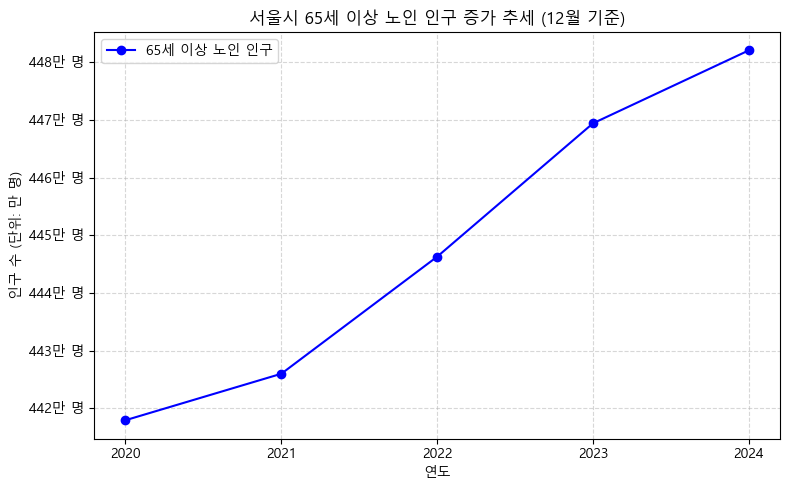

In [54]:

# -------------------------------
# 컬럼명과 문자열 공백 제거
# -------------------------------
for df in [elderly_2020_2022, elderly_2023_2025]:
    df.columns = df.columns.str.replace('"', '').str.strip()
    df['구분별'] = df['구분별'].astype(str).str.replace('"','').str.strip()
    df['동별'] = df['동별'].astype(str).str.replace('"','').str.strip()

# -------------------------------
# 합계 행 필터링
# -------------------------------
sum_2020_2022 = elderly_2020_2022[(elderly_2020_2022['구분별']=='세대') & 
                                  (elderly_2020_2022['동별']=='합계')]
sum_2023_2025 = elderly_2023_2025[(elderly_2023_2025['구분별']=='세대') & 
                                  (elderly_2023_2025['동별']=='합계')]

# -------------------------------
# 12월 데이터 컬럼
# -------------------------------
dec_columns_2020_2022 = ['2020. 12 월', '2021. 12 월', '2022. 12 월']
dec_columns_2023_2025 = ['2023. 12 월', '2024. 12 월']

# -------------------------------
# 문자열 -> 숫자 변환
# -------------------------------
def clean_to_int(series):
    return series.replace(r'[",\s]', '', regex=True).astype(int)

elderly_dec_2020_2022 = clean_to_int(sum_2020_2022[dec_columns_2020_2022].iloc[0])
elderly_dec_2023_2025 = clean_to_int(sum_2023_2025[dec_columns_2023_2025].iloc[0])

# -------------------------------
# 연도별 시리즈 합치기
# -------------------------------
elderly_dec_series = pd.concat([elderly_dec_2020_2022, elderly_dec_2023_2025])
elderly_dec_series.index = [2020, 2021, 2022, 2023, 2024]

# -------------------------------
# [수정됨] 만 단위로 변환 (기존 1e8 -> 10000)
# -------------------------------
values_in_10k = elderly_dec_series.values / 10000

# -------------------------------
# 그래프 그리기
# -------------------------------
plt.figure(figsize=(8,5))
plt.plot(elderly_dec_series.index, values_in_10k, marker='o', linestyle='-', color='blue', label='65세 이상 노인 인구')

# [수정됨] y축 숫자 옆에 "만 명" 붙이기, 소수점 제거하고 쉼표 추가
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}만 명')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('서울시 65세 이상 노인 인구 증가 추세 (12월 기준)')
plt.xlabel('연도')
plt.ylabel('인구 수 (단위: 만 명)') # y축 라벨에도 단위 표시 추가
plt.xticks(elderly_dec_series.index)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

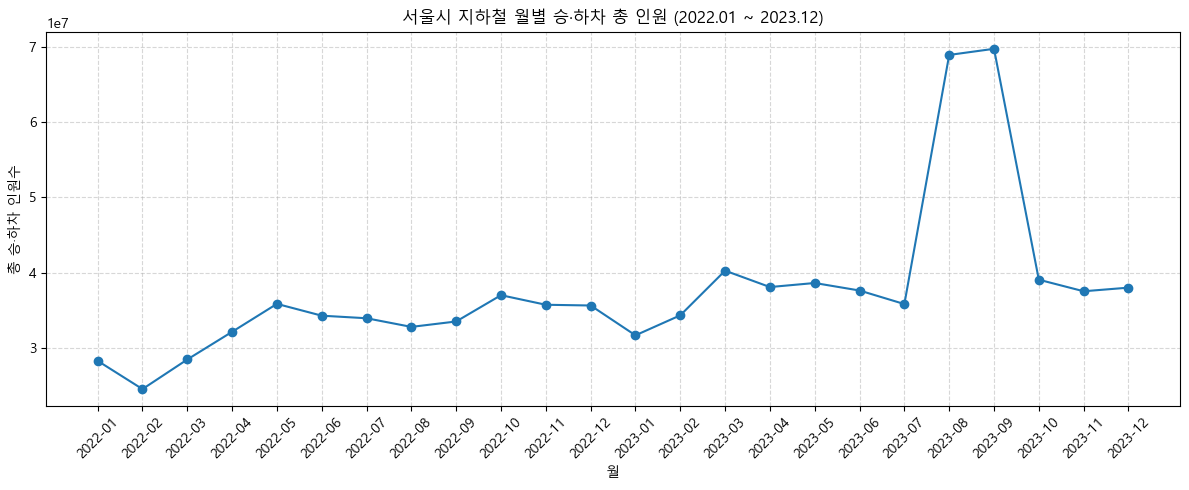

In [56]:

# -----------------------------
# 1) 2022년 + 2023년 묶기
# -----------------------------
df = pd.concat([senior22_df, senior23_df], ignore_index=True)

# -----------------------------
# 2) 날짜 변환
# -----------------------------
df['수송일자'] = pd.to_datetime(df['수송일자'])

# -----------------------------
# 3) 시간대 컬럼들 자동 추출
# -----------------------------
time_columns = [col for col in df.columns if '시간대' in col]

# -----------------------------
# 4) 승차/하차 구분 제거 → 하루 총 승하차량 만들기
# -----------------------------
# 시간대들의 합 계산
df['sum_by_row'] = df[time_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# 날짜 + 역 기준으로 묶어서(승차/하차 합쳐짐) 하루 총합 계산
daily = df.groupby('수송일자')['sum_by_row'].sum().reset_index()

# -----------------------------
# 5) 2022-01-01 ~ 2023-12-31 기간 필터링
# -----------------------------
mask = (daily['수송일자'] >= '2022-01-01') & (daily['수송일자'] <= '2023-12-31')
daily = daily[mask]

# -----------------------------
# 6) 월별 합계 만들기
# -----------------------------
daily['년월'] = daily['수송일자'].dt.to_period('M')
monthly = daily.groupby('년월')['sum_by_row'].sum().reset_index()
monthly['년월'] = monthly['년월'].astype(str)

# -----------------------------
# 7) 시각화
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(monthly['년월'], monthly['sum_by_row'], marker='o')

plt.title("서울시 지하철 월별 승·하차 총 인원 (2022.01 ~ 2023.12)")
plt.xlabel("월")
plt.ylabel("총 승·하차 인원수")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


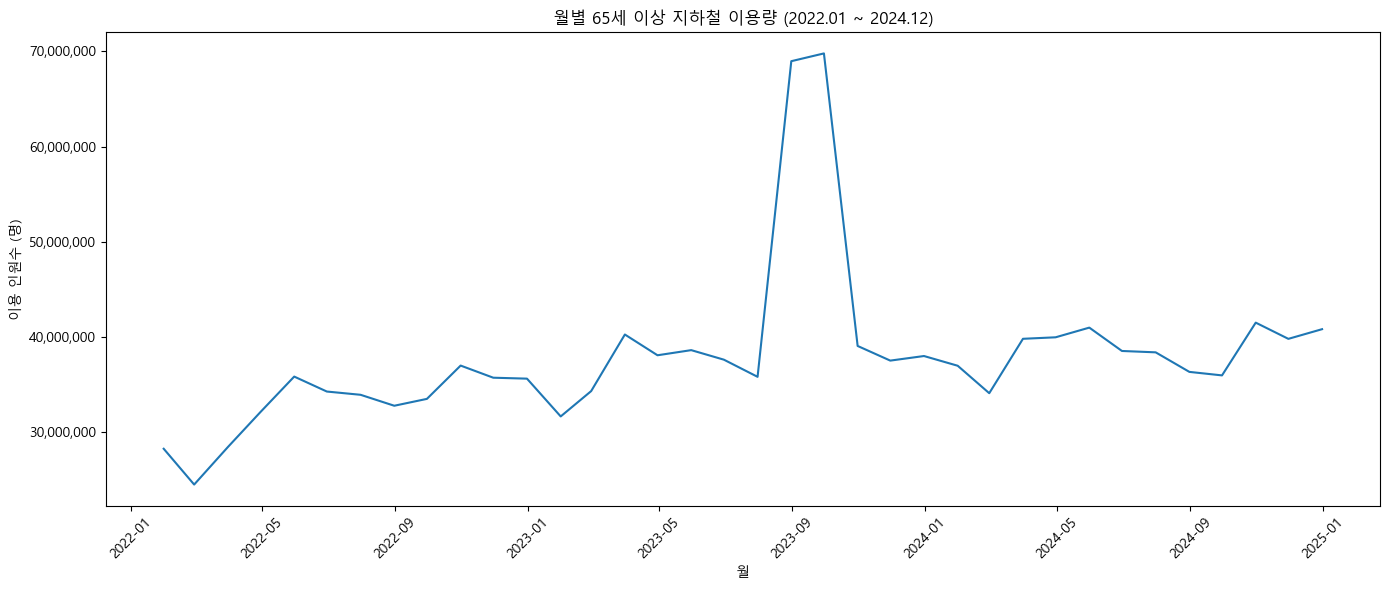

In [61]:

# 1) 날짜 컬럼을 datetime으로 변환
senior22_df['수송일자'] = pd.to_datetime(senior22_df['수송일자'])
senior23_df['수송일자'] = pd.to_datetime(senior23_df['수송일자'])
senior24_df['수송일자'] = pd.to_datetime(senior24_df['수송일자'])

# 2) 승하차 총합 컬럼 만들기
hour_columns = senior22_df.columns[5:]  # 시간대 컬럼들 (06시 이전~24시 이후)

senior22_df['total'] = senior22_df[hour_columns].sum(axis=1)
senior23_df['total'] = senior23_df[hour_columns].sum(axis=1)
senior24_df['total'] = senior24_df[hour_columns].sum(axis=1)

# 3) 데이터 합치기
all_df = pd.concat([senior22_df, senior23_df, senior24_df], ignore_index=True)

# 4) 월 단위 집계
monthly_stats = all_df.resample('M', on='수송일자')['total'].sum()

# 5) 시각화
plt.figure(figsize=(14, 6))
plt.plot(monthly_stats.index, monthly_stats.values)

# y축 천단위 콤마 추가
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

plt.title("월별 65세 이상 지하철 이용량 (2022.01 ~ 2024.12)")
plt.xlabel("월")
plt.ylabel("이용 인원수 (명)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


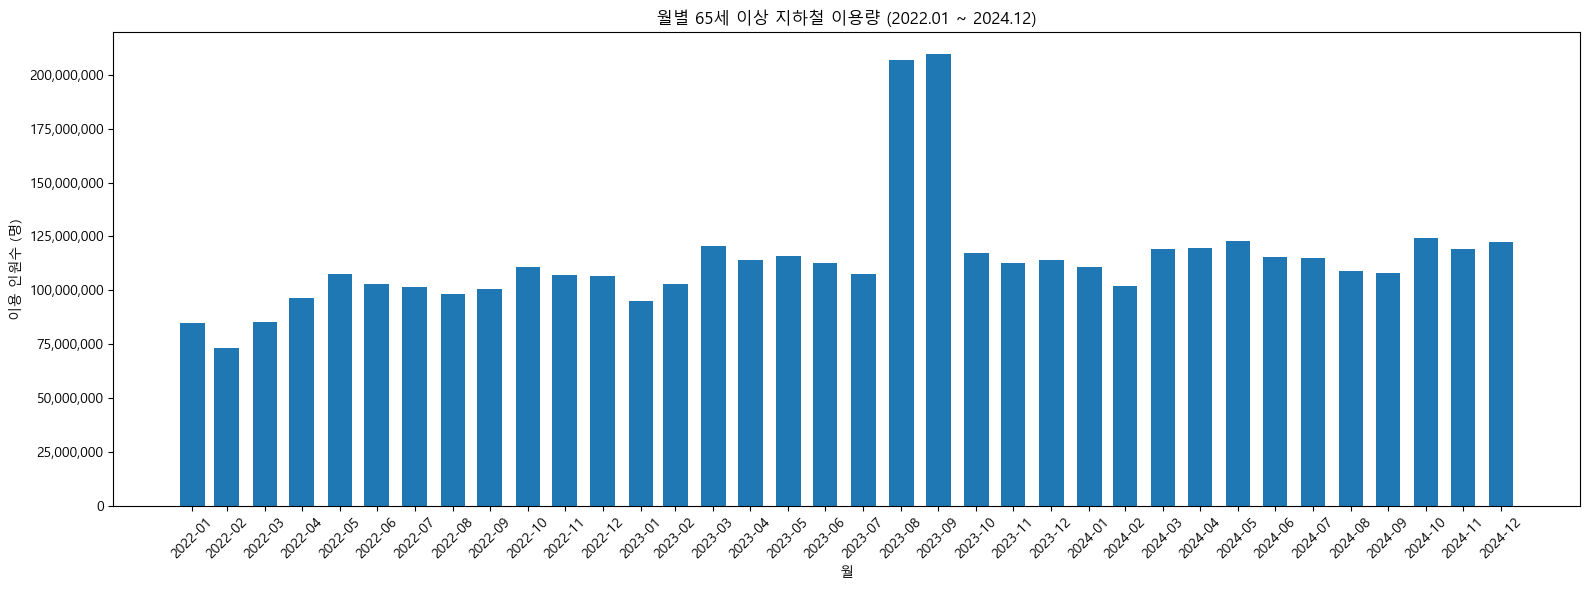

In [63]:
# 1) 날짜 컬럼 datetime 변환
senior22_df['수송일자'] = pd.to_datetime(senior22_df['수송일자'])
senior23_df['수송일자'] = pd.to_datetime(senior23_df['수송일자'])
senior24_df['수송일자'] = pd.to_datetime(senior24_df['수송일자'])

# 2) 시간대 컬럼 선택 (5번째 이후 전부)
hour_columns = senior22_df.columns[5:]

# 3) 승하차 합계 생성
senior22_df['total'] = senior22_df[hour_columns].sum(axis=1)
senior23_df['total'] = senior23_df[hour_columns].sum(axis=1)
senior24_df['total'] = senior24_df[hour_columns].sum(axis=1)

# 4) 데이터 합치기
all_df = pd.concat([senior22_df, senior23_df, senior24_df], ignore_index=True)

# 5) 월별 합계 계산
monthly_stats = all_df.resample('M', on='수송일자')['total'].sum()

# 6) x축 라벨(YYYY-MM) 생성
month_labels = monthly_stats.index.strftime("%Y-%m")

# 7) 막대그래프 그리기 (width 크게 설정)
plt.figure(figsize=(16, 6))
plt.bar(monthly_stats.index, monthly_stats.values, width=20)  # 🎯 막대 두껍게

# y축 천단위 콤마
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# 모든 월 표시
plt.xticks(monthly_stats.index, month_labels, rotation=45)

plt.title("월별 65세 이상 지하철 이용량 (2022.01 ~ 2024.12)")
plt.xlabel("월")
plt.ylabel("이용 인원수 (명)")
plt.tight_layout()
plt.show()


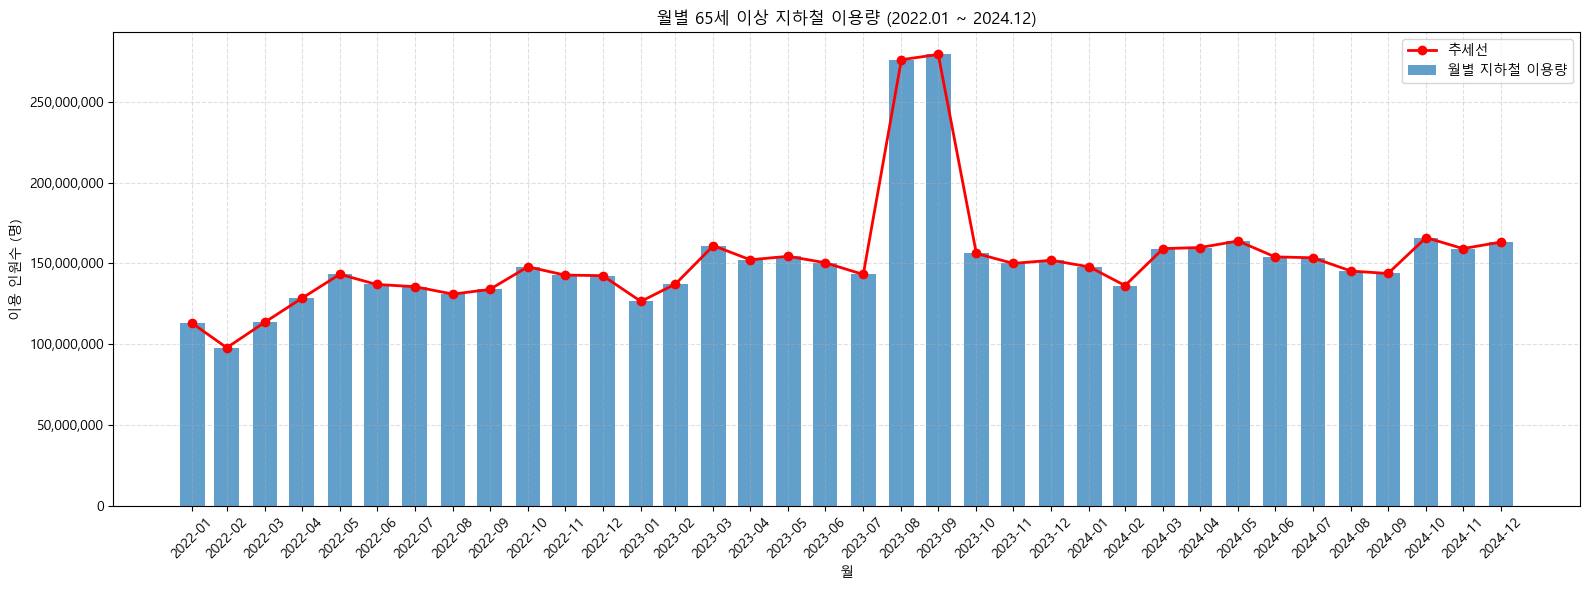

In [64]:

# 1) 날짜 컬럼 datetime 변환
senior22_df['수송일자'] = pd.to_datetime(senior22_df['수송일자'])
senior23_df['수송일자'] = pd.to_datetime(senior23_df['수송일자'])
senior24_df['수송일자'] = pd.to_datetime(senior24_df['수송일자'])

# 2) 시간대 컬럼 선택 (5번째 이후 전부)
hour_columns = senior22_df.columns[5:]

# 3) 승하차 합계 생성
senior22_df['total'] = senior22_df[hour_columns].sum(axis=1)
senior23_df['total'] = senior23_df[hour_columns].sum(axis=1)
senior24_df['total'] = senior24_df[hour_columns].sum(axis=1)

# 4) 데이터 합치기
all_df = pd.concat([senior22_df, senior23_df, senior24_df], ignore_index=True)

# 5) 월별 합계 계산
monthly_stats = all_df.resample('M', on='수송일자')['total'].sum()

# 6) x축 라벨(YYYY-MM) 생성
month_labels = monthly_stats.index.strftime("%Y-%m")

# --- 그래프 그리기 ---
plt.figure(figsize=(16, 6))

# ▶ 막대그래프 (두꺼운 width)
plt.bar(monthly_stats.index, monthly_stats.values, width=20, alpha=0.7, label="월별 지하철 이용량")

# ▶ 막대 상단을 잇는 선 그래프
plt.plot(monthly_stats.index, monthly_stats.values, marker='o', linewidth=2, color='red', label="추세선")

# y축 천단위 콤마 적용
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# 모든 월 라벨 표시
plt.xticks(monthly_stats.index, month_labels, rotation=45)

plt.title("월별 65세 이상 지하철 이용량 (2022.01 ~ 2024.12)")
plt.xlabel("월")
plt.ylabel("이용 인원수 (명)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


In [67]:

# ---------------------------
# 1. 시간대 컬럼 정의
# ---------------------------
time_cols = [
    '06시간대이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대',
    '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대',
    '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대',
    '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후'
]

# ---------------------------
# 2. 일일총승객수 컬럼 생성
# ---------------------------
def add_total_passengers(df):
    for col in time_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    df['일일총승객수'] = df[time_cols].sum(axis=1)
    return df

# 적용
senior22_df = add_total_passengers(senior22_df)
senior23_df = add_total_passengers(senior23_df)
senior24_df = add_total_passengers(senior24_df)

# ---------------------------
# 3. 날짜 컬럼 datetime 변환
# ---------------------------
for df in [senior22_df, senior23_df, senior24_df]:
    df['수송일자'] = pd.to_datetime(df['수송일자'])

# ---------------------------
# 4. 월 단위 합계 계산
# ---------------------------
def monthly_sum(df):
    df_month = df.groupby(df['수송일자'].dt.to_period('M'))['일일총승객수'].sum()
    df_month.index = df_month.index.to_timestamp()
    return df_month

senior22_month = monthly_sum(senior22_df)
senior23_month = monthly_sum(senior23_df)
senior24_month = monthly_sum(senior24_df)

# 2022년 1월 ~ 2024년 12월 월별 합치기
all_month = pd.concat([senior22_month, senior23_month, senior24_month])
all_month = all_month.sort_index()

# ---------------------------
# 5. 그래프 그리기 (막대+선)
# ---------------------------
fig = go.Figure()

# 막대그래프
fig.add_trace(go.Bar(
    x=all_month.index,
    y=all_month.values,
    name='월별 승하차 총량',
    marker_color='skyblue'
))

# 상단 선 연결
fig.add_trace(go.Scatter(
    x=all_month.index,
    y=all_month.values,
    mode='lines+markers',
    name='승하차 추세',
    line=dict(color='crimson', width=2),
    marker=dict(size=5)
))

# ---------------------------
# 6. y축 눈금 만 명 단위로 설정
# ---------------------------
y_max = all_month.max()*1.1
tick_vals = np.arange(0, y_max, 5000000)  # 500만 단위
tick_texts = [f"{int(v/10000)}만 명" for v in tick_vals]

fig.update_layout(
    title="2022~2024년 월별 65세 이상 승하차 총량",
    xaxis_title="월",
    yaxis_title="승하차 총량",
    yaxis=dict(
        tickmode='array',
        tickvals=tick_vals,
        ticktext=tick_texts
    ),
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m")  # x축 월 표시
)

fig.show()
